In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_classification

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

%matplotlib inline
from matplotlib import pyplot as plt

# Datasource: US Census.gov

### - Employment data by County
#### -- county (county/state)
#### -- labor_force
#### -- employed
#### -- unemployed_pct

### - Demographic population and race data by County

#### -- county (county/state)
#### -- population
#### -- race_white
#### -- race_black
#### -- race_native
#### -- race_asian
#### -- race_islander
#### -- race_other
#### -- race_two_or_more

---

# This model uses these X columns:
---
#### - race_white
#### - race_black
#### - race_asian
#### - race_other (combined race_other, race_islander, race_native)
#### - race_two_or_more

---

## To Predict one of these Y column:

# labor_force
# employed
# unemployed

---

There are sample tests way at the bottom that simulates simulate the response the user would get if we were to provide them with a form for them to enter in values and hit submit. 

The tests below shows you the "change" in labor_force.


---

In [2]:
employment_county_df  = pd.read_csv('../data_files/Employment_by_County.csv', index_col=0)
employment_county_df.head(5)

,county,labor_force,employed,unemployed,unemployed_pct,population,race_white,race_black,race_native,race_asian,race_islander,race_other,race_two_or_more
geoid,,,,,,,,,,,,,
1001,"Autauga County, Alabama",25838,24576,1262,4.9,58805,42160,11445,217,881,35,910,3157
1003,"Baldwin County, Alabama",96763,91338,5425,5.6,231767,189399,18217,1582,2067,143,5335,15024
1005,"Barbour County, Alabama",8587,7982,605,7.0,25223,11317,11933,116,117,1,1039,700
1007,"Bibb County, Alabama",8640,8067,573,6.6,22293,16555,4413,60,32,9,465,759
1009,"Blount County, Alabama",24661,23653,1008,4.1,59134,50663,845,337,178,24,3431,3656


# Copy of the dataframe to feed ML 



In [3]:
employment_county_copy = employment_county_df.copy()

In [4]:
employment_county_copy.columns.to_list()

['county',
 'labor_force',
 'employed',
 'unemployed',
 'unemployed_pct',
 'population',
 'race_white',
 'race_black',
 'race_native',
 'race_asian',
 'race_islander',
 'race_other',
 'race_two_or_more']

In [5]:
employment_county_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3125 entries, 1001 to 56045
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   county            3125 non-null   object 
 1   labor_force       3125 non-null   int64  
 2   employed          3125 non-null   int64  
 3   unemployed        3125 non-null   int64  
 4   unemployed_pct    3125 non-null   float64
 5   population        3125 non-null   int64  
 6   race_white        3125 non-null   int64  
 7   race_black        3125 non-null   int64  
 8   race_native       3125 non-null   int64  
 9   race_asian        3125 non-null   int64  
 10  race_islander     3125 non-null   int64  
 11  race_other        3125 non-null   int64  
 12  race_two_or_more  3125 non-null   int64  
dtypes: float64(1), int64(11), object(1)
memory usage: 341.8+ KB


In [6]:
employment_county_copy['race_others']= employment_county_copy[['race_native','race_islander','race_other']].sum(axis=1)
employment_county_copy.head(5)

,county,labor_force,employed,unemployed,unemployed_pct,population,race_white,race_black,race_native,race_asian,race_islander,race_other,race_two_or_more,race_others
geoid,,,,,,,,,,,,,,
1001,"Autauga County, Alabama",25838,24576,1262,4.9,58805,42160,11445,217,881,35,910,3157,1162
1003,"Baldwin County, Alabama",96763,91338,5425,5.6,231767,189399,18217,1582,2067,143,5335,15024,7060
1005,"Barbour County, Alabama",8587,7982,605,7.0,25223,11317,11933,116,117,1,1039,700,1156
1007,"Bibb County, Alabama",8640,8067,573,6.6,22293,16555,4413,60,32,9,465,759,534
1009,"Blount County, Alabama",24661,23653,1008,4.1,59134,50663,845,337,178,24,3431,3656,3792


In [7]:
# reducing columns to improve model performance 
employment_county_copy = employment_county_copy.drop(['race_native','race_islander','race_other'],axis=1)

In [8]:
employment_county_copy.isnull().values.any()

False

In [9]:
employment_county_copy.shape

(3125, 11)

In [10]:
employment_county_copy.columns.to_list()

['county',
 'labor_force',
 'employed',
 'unemployed',
 'unemployed_pct',
 'population',
 'race_white',
 'race_black',
 'race_asian',
 'race_two_or_more',
 'race_others']

In [11]:
employment_county_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3125 entries, 1001 to 56045
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   county            3125 non-null   object 
 1   labor_force       3125 non-null   int64  
 2   employed          3125 non-null   int64  
 3   unemployed        3125 non-null   int64  
 4   unemployed_pct    3125 non-null   float64
 5   population        3125 non-null   int64  
 6   race_white        3125 non-null   int64  
 7   race_black        3125 non-null   int64  
 8   race_asian        3125 non-null   int64  
 9   race_two_or_more  3125 non-null   int64  
 10  race_others       3125 non-null   int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 293.0+ KB


# Targeting "labor_force" but we can target any of the employment columns

- labor_force
- employed
- unemployed_pct

In [12]:
X = employment_county_copy[['race_white', 'race_black', 'race_asian', 'race_two_or_more', 'race_others']]
y = employment_county_copy['employed'] 

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=0)

In [16]:
regressor = RandomForestRegressor(n_estimators=10,random_state=0)
regressor.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [17]:
y_pred = regressor.predict(X_test)

In [18]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9769284289216615

In [19]:
regressor.score(X_train,y_train)

0.9724440917750865

In [20]:
regressor.score(X_test,y_test)

0.9769284289216615

In [21]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
mae

4515.648

## Feature importance

In [22]:
sorted(zip(regressor.feature_importances_, X.columns), reverse=True)

[(0.5592371981682375, 'race_white'),
 (0.23269816198244708, 'race_two_or_more'),
 (0.10103205161474171, 'race_asian'),
 (0.06629645451238447, 'race_black'),
 (0.040736133722189094, 'race_others')]

### MAE seem a bit high, but consider the min max range

In [23]:
max_labor_force = employment_county_df['labor_force'].max()
min_labor_force = employment_county_df['labor_force'].min()
print ('min = ', min_labor_force)
print('max = ', max_labor_force)

min =  184
max =  4921499


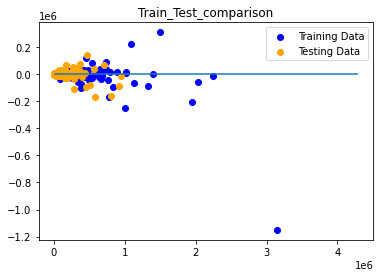

In [24]:
plt.scatter(regressor.predict(X_train), regressor.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(regressor.predict(X_test), regressor.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Train_Test_comparison")
plt.show()

In [25]:
print(f'Actual:\t\t{list(y_test[:10])}')
print(f'Predicted:\t{list(regressor.predict(X_test[:10]))}')

Actual:		[4639, 2946, 26156, 25875, 8971, 19701, 14840, 125114, 5375, 12815]
Predicted:	[4314.4, 3455.8, 28800.8, 24286.8, 9739.0, 20772.6, 16806.8, 126448.0, 5054.4, 12584.9]


# START MODEL TESTING

- A random row was selected to use as baseline values for comparison
- Ran the prediction 5 times
 - each time changing the population of a race by N
- Prints out the change in labor_force

### Ignore block below - wip testing

In [26]:
test1 = employment_county_df[employment_county_df['county']=='Autauga County, Alabama']
test1 = test1[['race_white', 'race_black', 'race_asian', 'race_other', 'race_native', 'race_islander', 'race_two_or_more']].copy()
test1['race_others']= test1[['race_native','race_islander','race_other']].sum(axis=1)
test1.drop(columns=['race_other', 'race_native', 'race_islander'], inplace=True)
test1[:1]

,race_white,race_black,race_asian,race_two_or_more,race_others
geoid,,,,,
1001,42160,11445,881,3157,1162


---

# TEST A : Start with a random Baseline as reference

In [27]:
X_test[11:12]

,race_white,race_black,race_asian,race_two_or_more,race_others
geoid,,,,,
54011,82665,4811,1345,4642,887


In [28]:
baselineA = regressor.predict(X_test[11:12])[0]
print (f"TEST A : Baseline labor_force before change {baselineA}")

TEST A : Baseline labor_force before change 41796.8


# Change in labor_force when 500 to each race

In [52]:
# increase white by 500
prediction = regressor.predict([[82665,4811,1345,4642,887]])[0]
print(f"Predict labor_force to be {prediction}, a change of {prediction-baselineA}")

Predict labor_force to be 41796.8, a change of 0.0


In [30]:
# increase black by 500
prediction = regressor.predict([[7448,2898,108,1279,1731]])[0]
print(f"Predict labor_force to be {prediction}, a change of {prediction-baselineA}")

Predict labor_force to be 4534.8, a change of -37262.0


In [31]:
# increase asian by 500
prediction = regressor.predict([[7448,1898,608,1279,1731]])[0]
print(f"Predict labor_force to be {prediction}, a change of {prediction-baselineA}")

Predict labor_force to be 5263.8, a change of -36533.0


In [32]:
# increase race_two_or_more by 500
prediction = regressor.predict([[7448,1898,108,1779,1731]])[0]
print(f"Predict labor_force to be {prediction}, a change of {prediction-baselineA}")

Predict labor_force to be 4321.4, a change of -37475.4


In [33]:
# increase race_others by 500
prediction = regressor.predict([[7448,1898,108,1279,3231]])[0]
print(f"Predict labor_force to be {prediction}, a change of {prediction-baselineA}")

Predict labor_force to be 4719.3, a change of -37077.5


# TEST B : Start with a random Baseline as reference

In [34]:
(X_test[258:259])

,race_white,race_black,race_asian,race_two_or_more,race_others
geoid,,,,,
30019,1474,0,13,129,45


In [40]:
baselineB = regressor.predict(X_test[258:259])[0]
print (f"TEST B : Baseline labor_force = {baselineB}")

TEST B : Baseline labor_force = 895.8


## Change in labor_force when adding 1000 to each race

In [46]:
# increase white by 1000
prediction = regressor.predict([[2474,0,13,129,45]])[0]
print(f"Predict labor_force to be {prediction}, a change of {prediction-baselineB}")

Predict labor_force to be 1382.5, a change of 486.70000000000005


In [47]:
# increase black by 1000
prediction = regressor.predict([[1474,1000,13,129,45]])[0]
print(f"Predict labor_force to be {prediction}, a change of {prediction-baselineB}")

Predict labor_force to be 1055.5, a change of 159.70000000000005


In [48]:
# increase asian by 1000
prediction = regressor.predict([[1474,0,1013,129,45]])[0]
print(f"Predict labor_force to be {prediction}, a change of {prediction-baselineB}")

Predict labor_force to be 1178.8, a change of 283.0


In [49]:
# increase race_two_or_more by 1000
prediction = regressor.predict([[1474,0,13,1129,45]])[0]
print(f"Predict labor_force to be {prediction}, a change of {prediction-baselineB}")

Predict labor_force to be 1355.1, a change of 459.29999999999995


In [50]:
# increase race_others by 1000
prediction = regressor.predict([[1474,0,13,129,1045]])[0]
print(f"Predict labor_force to be {prediction}, a change of {prediction-baselineB}")

Predict labor_force to be 1050.6, a change of 154.79999999999995


# TEST C : Start with a random Baseline as reference

In [54]:
(X_test[347:348])

,race_white,race_black,race_asian,race_two_or_more,race_others
geoid,,,,,
51143,44672,12417,292,2129,991


In [55]:
baselineC = regressor.predict(X_test[347:348])[0]
print (f"TEST C : Baseline labor_force = {baselineC}")

TEST C : Baseline labor_force = 24475.4


## Change in labor_force when 1000 to each race

In [61]:
# increase white by 1000
prediction = regressor.predict([[45672,12417,292,2129,991]])[0]
print(f"Predict labor_force to be {prediction}, a change of {prediction-baselineC}")

Predict labor_force to be 24165.7, a change of -309.7000000000007


In [62]:
# increase black by 1000
prediction = regressor.predict([[44672,13417,292,2129,991]])[0]
print(f"Predict labor_force to be {prediction}, a change of {prediction-baselineC}")

Predict labor_force to be 24475.4, a change of 0.0


In [63]:
# increase asian by 1000
prediction = regressor.predict([[44672,12417,1292,2129,991]])[0]
print(f"Predict labor_force to be {prediction}, a change of {prediction-baselineC}")

Predict labor_force to be 26051.0, a change of 1575.5999999999985


In [64]:
# increase race_two_or_more by 1000
prediction = regressor.predict([[44672,12417,292,3129,991]])[0]
print(f"Predict labor_force to be {prediction}, a change of {prediction-baselineC}")

Predict labor_force to be 25200.2, a change of 724.7999999999993


In [65]:
# increase race_others by 1000
prediction = regressor.predict([[44672,12417,292,2129,1991]])[0]
print(f"Predict labor_force to be {prediction}, a change of {prediction-baselineC}")

Predict labor_force to be 24523.7, a change of 48.29999999999927
